# Predictive Analytics for Stroke Prevention: Leveraging Clinical Data

DATA 144: Anthony Carlos Mendoza, Hyunji Park, Sohel Bagai, Vinson Wong, Younghan Lim (5)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Stroke Prediction Dataset

Data Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset (Confidential Source) 

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data Key

| #  | Attribute         | Description                                                         |
|----|-------------------|---------------------------------------------------------------------|
| 1  | id                | unique identifier                                                   |
| 2  | gender            | "Male", "Female" or "Other"                                         |
| 3  | age               | age of the patient                                                  |
| 4  | hypertension      | 0 if the patient doesn't have hypertension, 1 if the patient does  |
| 5  | heart_disease     | 0 if the patient doesn't have any heart diseases, 1 if they do     |
| 6  | ever_married      | "No" or "Yes"                                                       |
| 7  | work_type         | "children", "Govt_job", "Never_worked", "Private" or "Self-employed"|
| 8  | Residence_type    | "Rural" or "Urban"                                                  |
| 9  | avg_glucose_level | average glucose level in blood                                      |
| 10 | bmi               | body mass index                                                     |
| 11 | smoking_status    | "formerly smoked", "never smoked", "smokes" or "Unknown"\*         |
| 12 | stroke            | 1 if the patient had a stroke or 0 if not                           |

\
\*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

# Exploratory Data Analysis 

### Summary Statistics of Stroke Dataset

In [ ]:
# Summary statistics for numerical variables
summary_statistics = df.describe()
summary_statistics

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

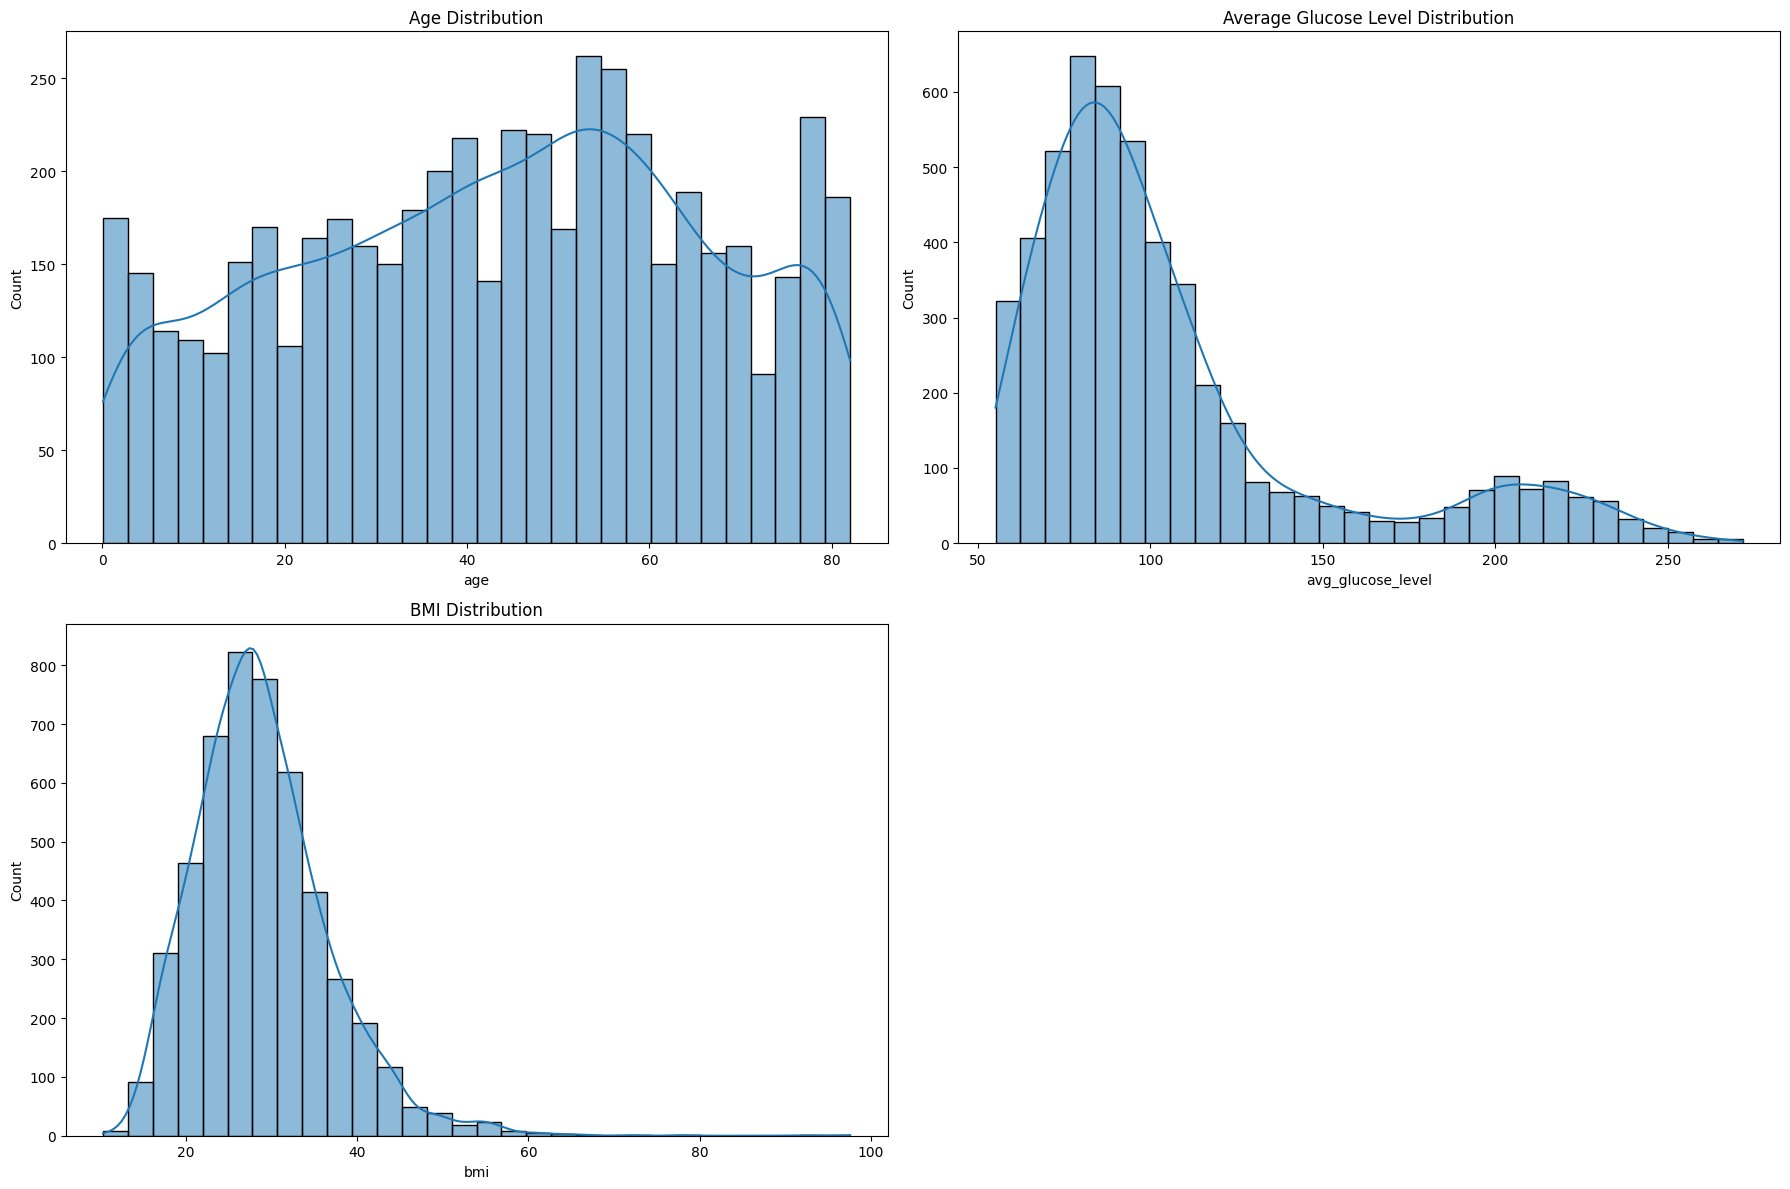

In [ ]:
# Setting up the visualization
plt.figure(figsize=(18, 12))

# Plotting distributions of key numerical variables
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['avg_glucose_level'], bins=30, kde=True)
plt.title('Average Glucose Level Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['bmi'].dropna(), bins=30, kde=True)  # Dropping NaN values for BMI
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

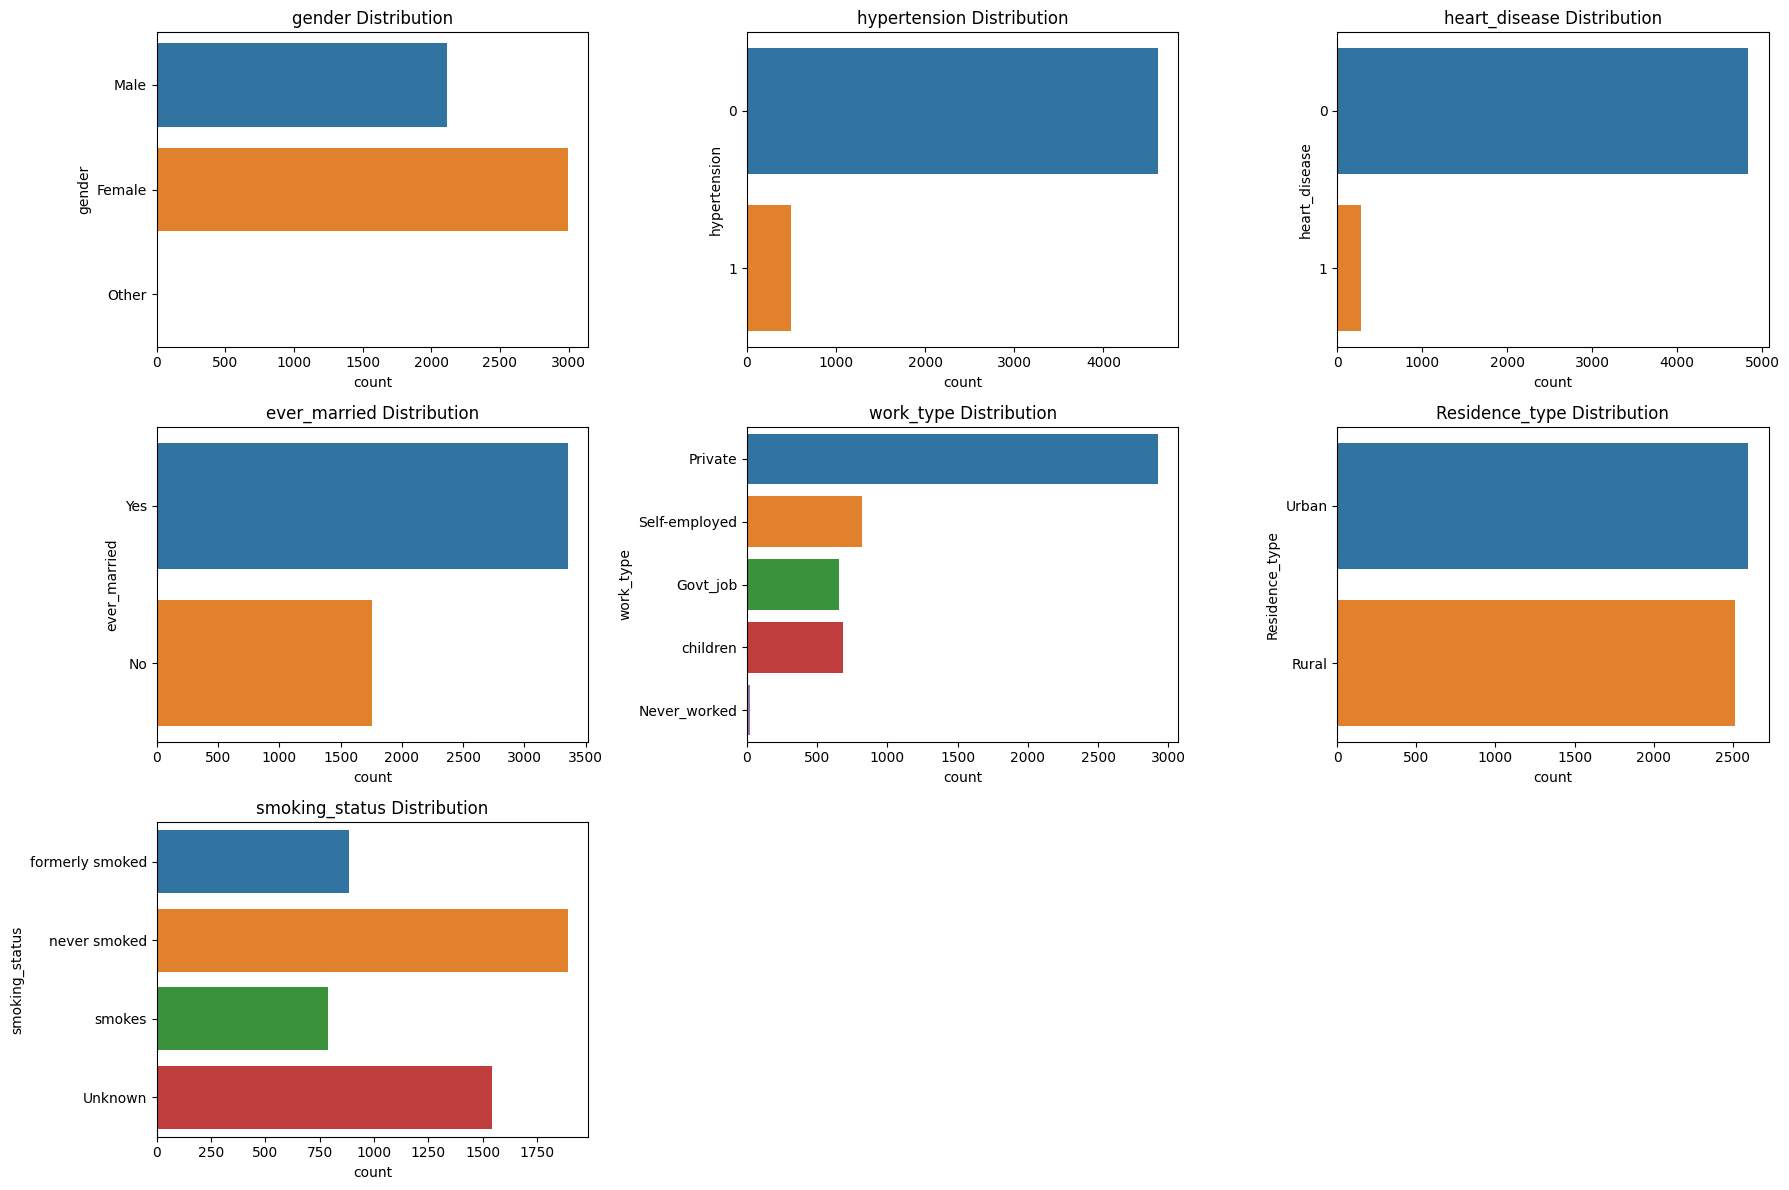

In [ ]:
# Countplots for categorical variables
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
plt.figure(figsize=(18, 12))

for i, var in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=var, data=df)
    plt.title(f'{var} Distribution')

plt.tight_layout()
plt.show()

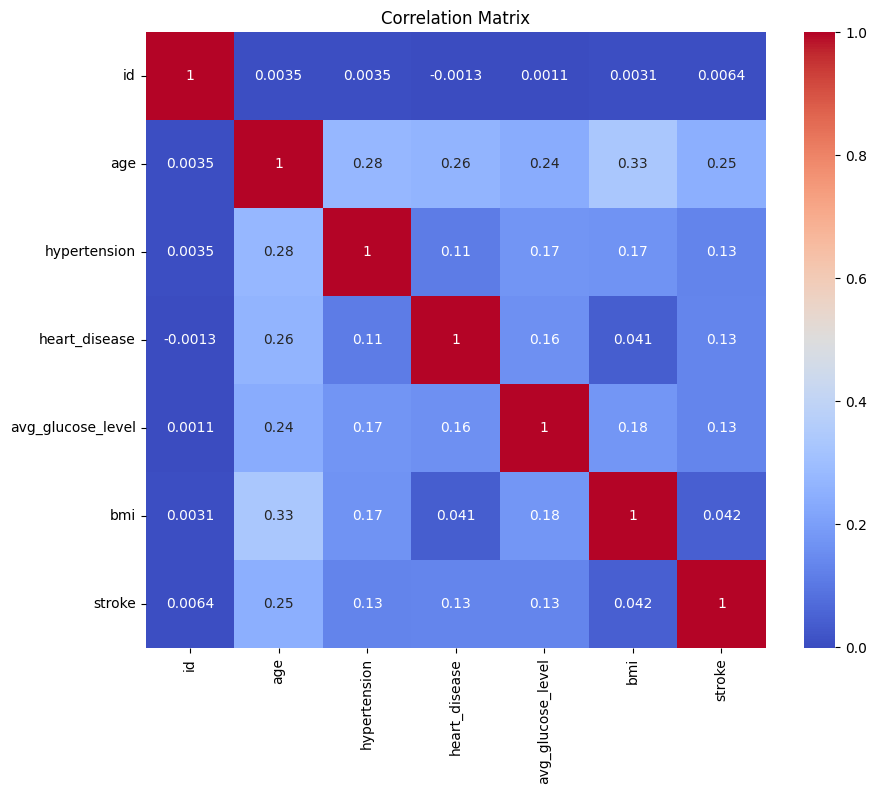

In [ ]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Summary Statistics for Stroke 

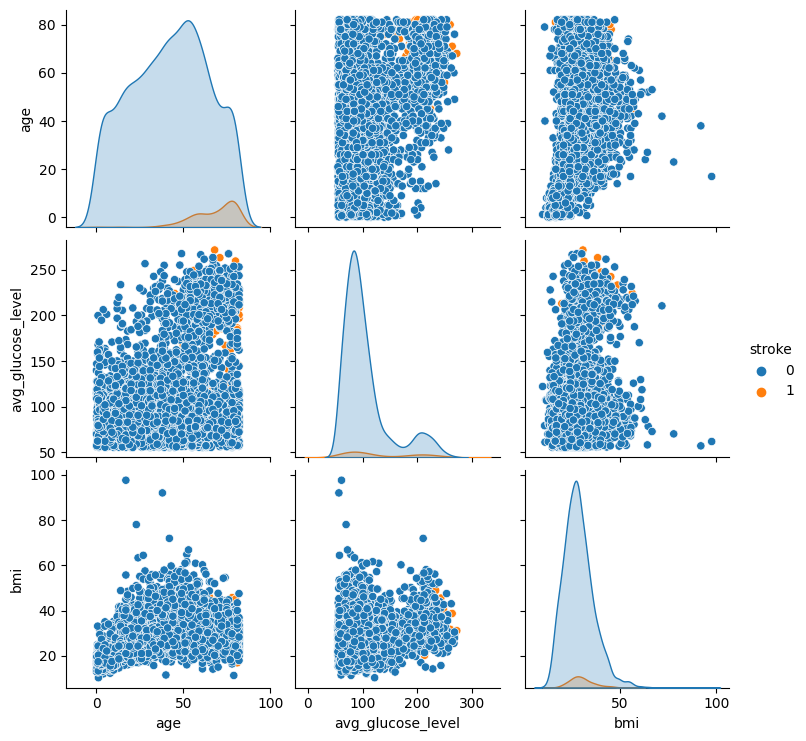

In [ ]:
# Pair plot for numerical variables
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', diag_kind='kde')
plt.show()

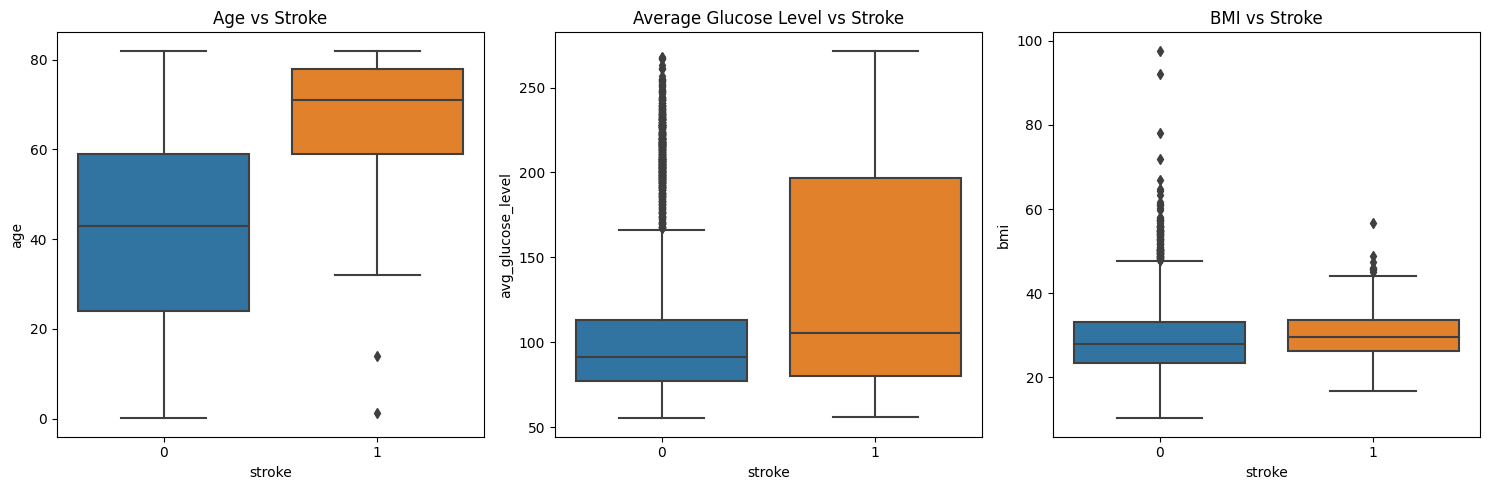

In [ ]:
# Box plots for numerical variables by stroke status
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age vs Stroke')

plt.subplot(1, 3, 2)
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Average Glucose Level vs Stroke')

plt.subplot(1, 3, 3)
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI vs Stroke')

plt.tight_layout()
plt.show()

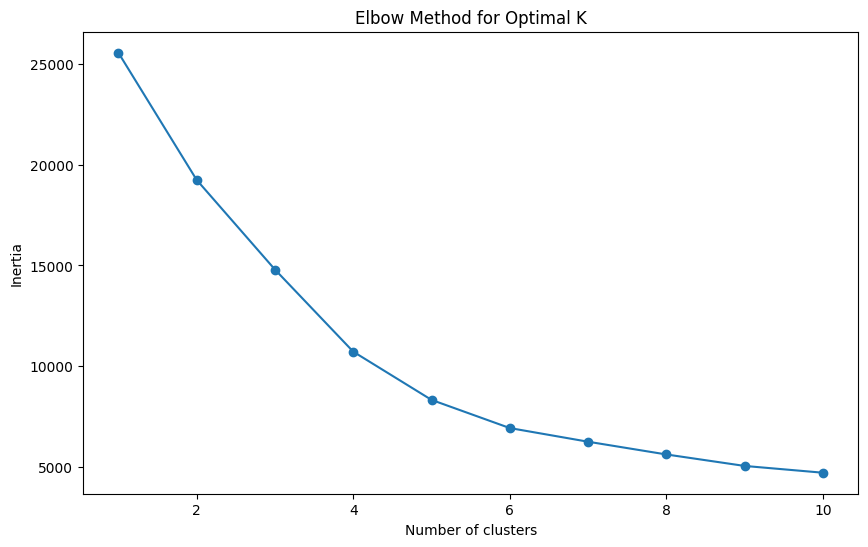

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np

# Handling missing values - Imputing missing BMI values with the mean
imputer = SimpleImputer(strategy='mean')
df['bmi_imputed'] = imputer.fit_transform(df[['bmi']])

# Selecting relevant features for clustering
features = df[['age', 'avg_glucose_level', 'bmi_imputed', 'hypertension', 'heart_disease']]

# Normalizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Using the Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


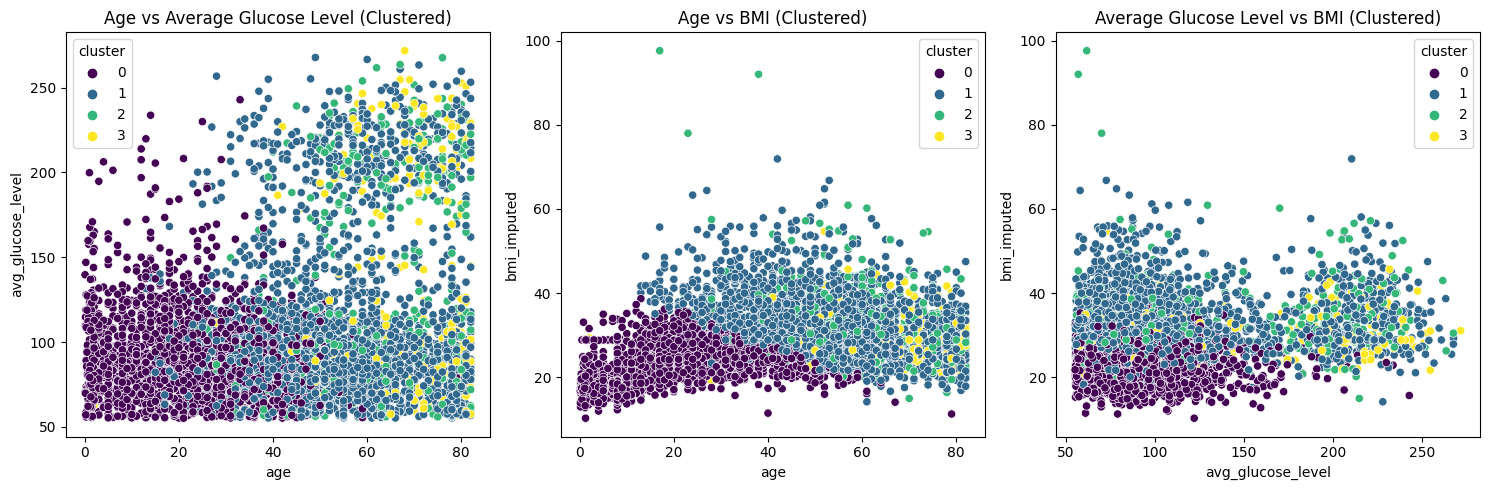

In [ ]:
# Handling missing values - Imputing missing BMI values with the mean
imputer = SimpleImputer(strategy='mean')
df['bmi_imputed'] = imputer.fit_transform(df[['bmi']])

# Selecting relevant features for clustering
features = df[['age', 'avg_glucose_level', 'bmi_imputed', 'hypertension', 'heart_disease']]

# Normalizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Proceeding with K-means clustering with 4 clusters (based on earlier analysis)
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Adding the cluster information to the original DataFrame
df['cluster'] = clusters

# Visualizing the clusters
# For visualization, we'll plot a few combinations of features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='avg_glucose_level', hue='cluster', data=df, palette='viridis')
plt.title('Age vs Average Glucose Level (Clustered)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='bmi_imputed', hue='cluster', data=df, palette='viridis')
plt.title('Age vs BMI (Clustered)')

plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_glucose_level', y='bmi_imputed', hue='cluster', data=df, palette='viridis')
plt.title('Average Glucose Level vs BMI (Clustered)')

plt.tight_layout()
plt.show()

# Data Preprocessing

### Missing Values Imputation in BMI 

In [ ]:
# Handling missing values for BMI
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_imputed,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.600000,3
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,28.893237,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.500000,3
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.400000,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,28.893237,2
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,40.000000,1
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,30.600000,1
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,25.600000,1


### One-Hot Encoding for Categorical Variables

In [ ]:
# One-Hot Encoding for Categorical Variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
one_hot_encoder = OneHotEncoder()
encoded_categorical_data = one_hot_encoder.fit_transform(df[categorical_cols]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_cols))
encoded_categorical_df

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Dropping the original categorical columns and adding the encoded ones
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_categorical_df], axis=1)
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_imputed,cluster,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,36.600000,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,28.1,1,28.893237,1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,32.500000,3,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,34.400000,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,24.000000,2,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,28.893237,2,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,44873,81.0,0,0,125.20,40.0,0,40.000000,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,19723,35.0,0,0,82.99,30.6,0,30.600000,1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,51.0,0,0,166.29,25.6,0,25.600000,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Normalization of Continuous Variables

In [ ]:
# Normalizing continuous variables
continuous_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_imputed,cluster,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,2.706375,1.005086,1,36.600000,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,0.786070,0,0,2.121559,-0.098981,1,28.893237,1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,1.626390,0,1,-0.005028,0.472536,1,32.500000,3,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,0.255342,0,0,1.437358,0.719327,1,34.400000,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,1.582163,1,0,1.501184,-0.631531,1,24.000000,2,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.626390,1,0,-0.494658,-0.098981,0,28.893237,2,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,44873,1.670617,0,0,0.420775,1.446713,0,40.000000,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,19723,-0.363842,0,0,-0.511443,0.225745,0,30.600000,1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,0.343796,0,0,1.328257,-0.423706,0,25.600000,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Machine Learning Methods

### Baseline Model on Entire Dataset

Since the majority of response is ’0’, our baseline model would always predict as 0.

In [ ]:
!pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE

columns=['model', 'validation accuracy', 'test accuracy']
models = [] 
#models = pd.DataFrame(columns=['model', 'validation accuracy', 'test accuracy', 'f1 score'])

In [ ]:
X = df.drop(['stroke','id', 'cluster'], axis=1)
Y = df['stroke']

# Initial train/test split
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Resampling algorithm
sm = BorderlineSMOTE()
X_temp, Y_temp = sm.fit_resample(X_temp, Y_temp)

# Further split to train/validations
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42)


In [ ]:
# Calculating the number of strokes vs no-strokes in the entire dataset
stroke_counts = df['stroke'].value_counts()
stroke_counts

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# Generating a confusion matrix of strokes in the dataset
cm_baseline = confusion_matrix(df['stroke'],[0] * df.shape[0])
cm_baseline

array([[4861,    0],
       [ 249,    0]])

In [ ]:
# Calculating the accuracy, true positive rate, and false positive rate of strokes in the dataset
accuracy_baseline = (cm_baseline.ravel()[0] + cm_baseline.ravel()[3]) / sum(cm_baseline.ravel())
TPR_baseline = cm_baseline.ravel()[3] / (cm_baseline.ravel()[3] + cm_baseline.ravel()[2])
FPR_baseline = cm_baseline.ravel()[1] / (cm_baseline.ravel()[1] + cm_baseline.ravel()[0])
print(accuracy_baseline, TPR_baseline, FPR_baseline)

0.9512720156555773 0.0 0.0


### Baseline Model from Train-Test Split

In [ ]:
# Baseline model from the train-test split
baseline_model_train = np.zeros(len(Y_val))
val_accuracy = accuracy_score(baseline_model_train, Y_val)

baseline_model_test = np.zeros(len(Y_test))  
test_accuracy = accuracy_score(baseline_model_test, Y_test)

models.append(['Baseline Model', val_accuracy, test_accuracy])

print("Baseline model performance on the validation set: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Baseline model report: ")
print(classification_report(Y_test, baseline_model_test))
print("Baseline model performance on the test set: {:.4f}%".format(test_accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, baseline_model_test))


Baseline model performance on the validation set: 50.9289%

Baseline model report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Baseline model performance on the test set: 93.9335%
Confusion Matrix: 
[[960   0]
 [ 62   0]]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

### Logistic Regression Model

In [ ]:
# Train the logistic regression model with default parameters
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

# Evaluate the model on the validation set
Y_val_lr = lr_model.predict(X_val)
val_accuracy = accuracy_score(Y_val, Y_val_lr)

# Evaluate the model on the test set
Y_pred_lr = lr_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_lr)

models.append(["LogReg Base", val_accuracy, accuracy])

print("Logistic Regression basic model performance on the validation set: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Logistic Regression basic model performance on test set: ")
print(classification_report(Y_test, Y_pred_lr))
print("Logistic Regression performance on the test set: {:.4f}%".format(accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred_lr))

Logistic Regression basic model performance on the validation set: 83.2159%

Logistic Regression basic model performance on test set: 
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       960
           1       0.19      0.76      0.30        62

    accuracy                           0.79      1022
   macro avg       0.58      0.77      0.59      1022
weighted avg       0.93      0.79      0.84      1022

Logistic Regression performance on the test set: 78.7671%
Confusion Matrix: 
[[758 202]
 [ 15  47]]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2', 'none'],
    'max_iter': [50, 100, 150]
}
# Perform hyperparameter tuning using GridSearchCV
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search_lr.fit(X_train, Y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s
/shared-libs/pyt

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 150], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [ ]:
print("Best Hyperparameters:", grid_search_lr.best_params_)

Best Hyperparameters: {'C': 100, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# Evaluate using the model trained with the best hyperparameters
best_lr_model = grid_search_lr.best_estimator_
Y_val_lr = best_lr_model.predict(X_val)
Y_pred_best_lr = best_lr_model.predict(X_test)
accuracy_best_val = accuracy_score(Y_val, Y_val_lr)
accuracy_best_lr = accuracy_score(Y_test, Y_pred_best_lr)

models.append(["LogReg Best", accuracy_best_val, accuracy_best_lr])

print("Logistic Regression model performance on the validation set after hyperparameter tuning: {:.4f}%".format(accuracy_best_val * 100))
print("=============================\n")
print("Logistic Regression model performance on test set: ")
print(classification_report(Y_test, Y_pred_best_lr))
print("Logistic Regression performance on the test set: {:.4f}%".format(accuracy_best_lr * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred_best_lr))

Logistic Regression model performance on the validation set after hyperparameter tuning: 81.6784%

Logistic Regression model performance on test set: 
              precision    recall  f1-score   support

           0       0.98      0.81      0.88       960
           1       0.19      0.71      0.30        62

    accuracy                           0.80      1022
   macro avg       0.58      0.76      0.59      1022
weighted avg       0.93      0.80      0.85      1022

Logistic Regression performance on the test set: 79.9413%
Confusion Matrix: 
[[773 187]
 [ 18  44]]


### Decision Tree Model

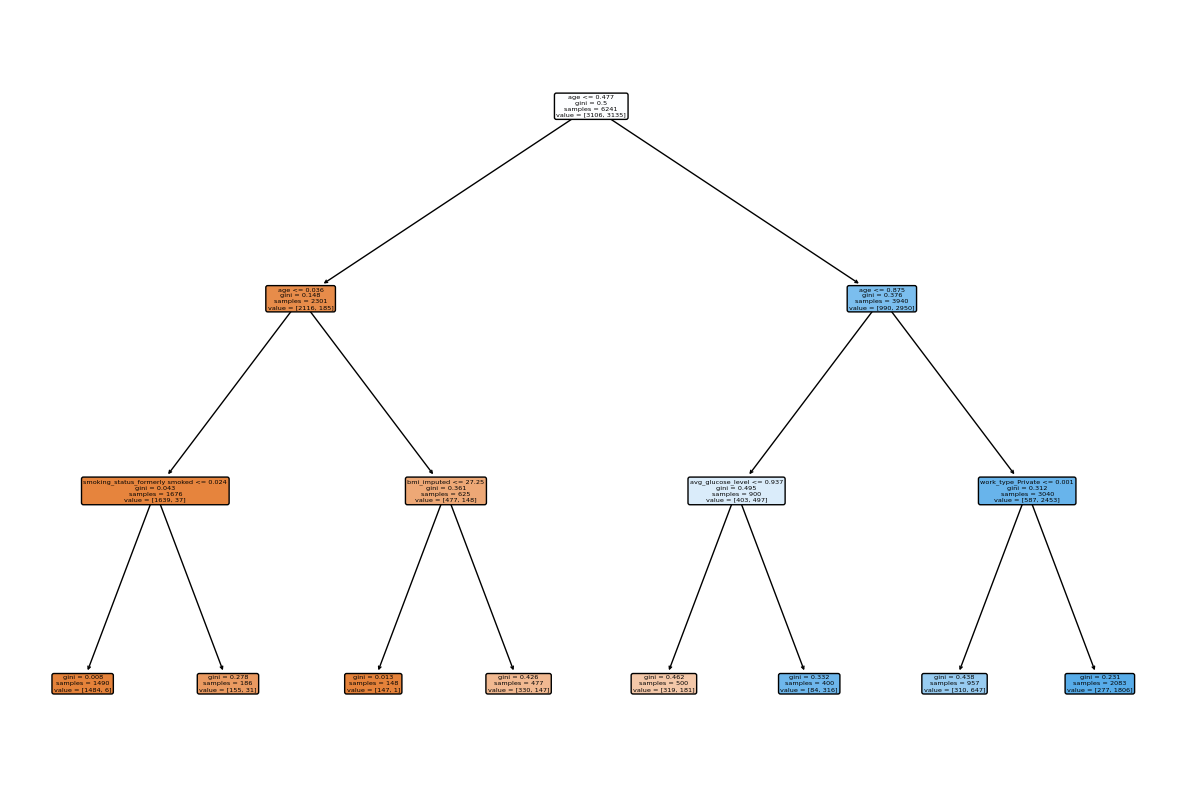

Decision Tree Rules:
|--- age <= 0.48
|   |--- age <= 0.04
|   |   |--- smoking_status_formerly smoked <= 0.02
|   |   |   |--- class: 0
|   |   |--- smoking_status_formerly smoked >  0.02
|   |   |   |--- class: 0
|   |--- age >  0.04
|   |   |--- bmi_imputed <= 27.25
|   |   |   |--- class: 0
|   |   |--- bmi_imputed >  27.25
|   |   |   |--- class: 0
|--- age >  0.48
|   |--- age <= 0.88
|   |   |--- avg_glucose_level <= 0.94
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  0.94
|   |   |   |--- class: 1
|   |--- age >  0.88
|   |   |--- work_type_Private <= 0.00
|   |   |   |--- class: 1
|   |   |--- work_type_Private >  0.00
|   |   |   |--- class: 1

Decision Tree model performance on the validation set: 83.0237%

Decision Tree model performance on test set: 
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       960
           1       0.18      0.71      0.28        62

    accuracy                           0.78      

In [ ]:
from sklearn import tree
from sklearn.tree import export_text

clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, Y_train)

fig,ax = plt.subplots(figsize=(15,10))
tree.plot_tree(clf, feature_names=X_train.columns, filled=True, rounded=True, ax=ax)
plt.show()

tree_rules = export_text(clf, feature_names=list(X_train.columns))
print("Decision Tree Rules:")
print(tree_rules)

val_accuracy = clf.score(X_val, Y_val)
y_pred = clf.predict(X_test)
test_accuracy = clf.score(X_test, Y_test)

models.append(["Decision Tree maxdep3", val_accuracy, test_accuracy])

print("Decision Tree model performance on the validation set: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Decision Tree model performance on test set: ")
print(classification_report(Y_test, y_pred))
print("Decision Tree model performance on the test set: {:.4f}%".format(test_accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))

In [ ]:
clf.tree_.max_depth

20

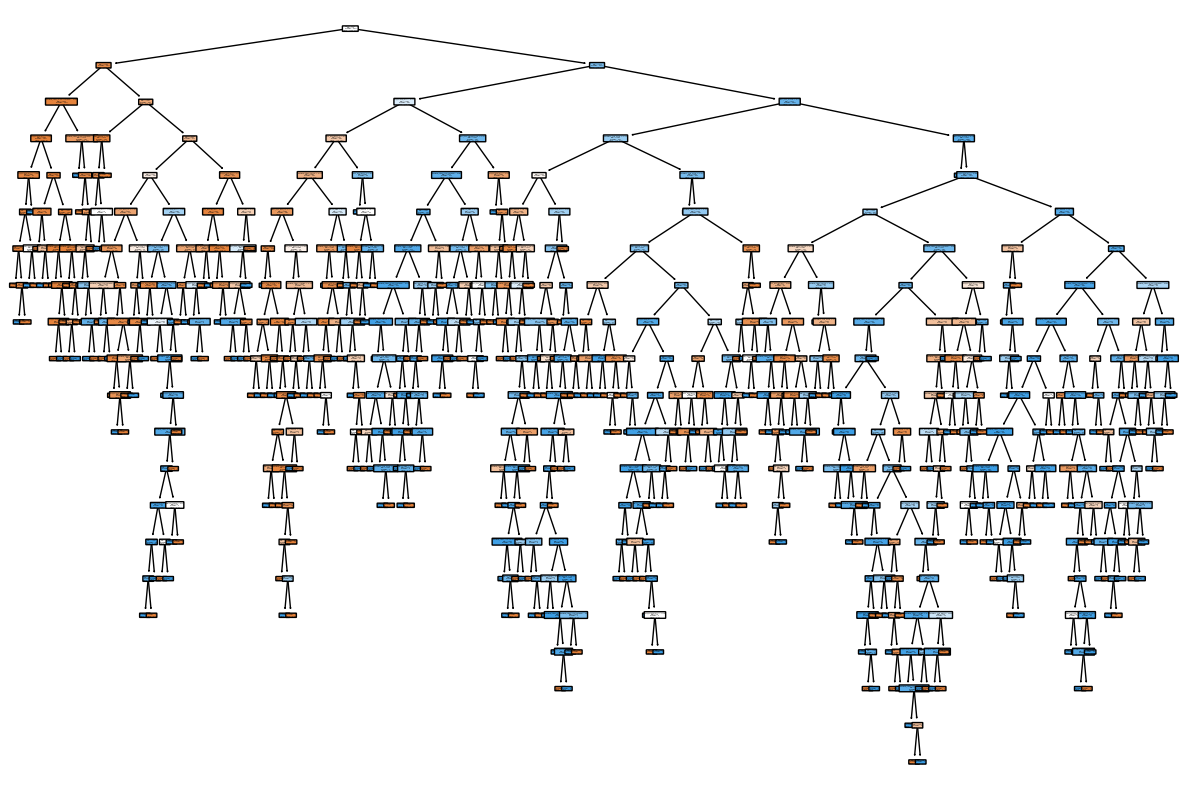

Decision Tree Rules:
|--- age <= 0.48
|   |--- age <= 0.04
|   |   |--- smoking_status_formerly smoked <= 0.02
|   |   |   |--- avg_glucose_level <= -1.02
|   |   |   |   |--- avg_glucose_level <= -1.02
|   |   |   |   |   |--- cluster <= 1.50
|   |   |   |   |   |   |--- bmi <= 0.23
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- bmi >  0.23
|   |   |   |   |   |   |   |--- bmi <= 0.29
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- bmi >  0.29
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cluster >  1.50
|   |   |   |   |   |   |--- bmi_imputed <= 42.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- bmi_imputed >  42.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_glucose_level >  -1.02
|   |   |   |   |   |--- class: 1
|   |   |   |--- avg_glucose_level >  -1.02
|   |   |   |   |--- age <= -1.85
|   |   |   |   |   |--- bmi_imputed <= 26.90
|   |   |   |   |  

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

fig,ax = plt.subplots(figsize=(15,10))
tree.plot_tree(clf, feature_names=X_train.columns, filled=True, rounded=True, ax=ax)
plt.show()

tree_rules = export_text(clf, feature_names=list(X_train.columns))
print("Decision Tree Rules:")
print(tree_rules)

val_accuracy = clf.score(X_val, Y_val)
y_pred = clf.predict(X_test)
test_accuracy = clf.score(X_test, Y_test)

models.append(["Decision Tree nomax", val_accuracy, test_accuracy])

print("Decision Tree model performance on the validation set: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Decision Tree model performance on test set: ")
print(classification_report(Y_test, y_pred))
print("Decision Tree model performance on the test set: {:.4f}%".format(test_accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
#import pydot

rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
y_val_pred = rf.predict(X_val)
y_pred = rf.predict(X_test)

tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')

val_accuracy = accuracy_score(Y_val, y_val_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

models.append(["Random Forest", val_accuracy, test_accuracy])

print("Random Forest model performance on the validation set: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Random Forest model performance on test set: ")
print(classification_report(Y_test, y_pred))
print("Random Forest model performance on the test set: {:.4f}%".format(test_accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))

Random Forest model performance on the validation set: 97.4375%

Random Forest model performance on test set: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.10      0.02      0.03        62

    accuracy                           0.93      1022
   macro avg       0.52      0.50      0.50      1022
weighted avg       0.89      0.93      0.91      1022

Random Forest model performance on the test set: 93.1507%
Confusion Matrix: 
[[951   9]
 [ 61   1]]


<img src="/tree.png" width="" align="" />

In [ ]:
rf2 = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf2.fit(X_train, Y_train)
tree_small = rf2.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png');

y_val_pred = rf2.predict(X_val)
y_pred = rf2.predict(X_test)

val_accuracy = accuracy_score(Y_val, y_val_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

models.append(["Random Forest maxdep3", val_accuracy, test_accuracy])

print("Random Forest model performance on the validation set: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Random Forest model report: ")
print(classification_report(Y_test, y_pred))
print("Random Forest model performance on the test set: {:.4f}%".format(test_accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))

Random Forest model performance on the validation set: 82.7034%

Random Forest model report: 
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       960
           1       0.17      0.73      0.27        62

    accuracy                           0.77      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.93      0.77      0.82      1022

Random Forest model performance on the test set: 76.5166%
Confusion Matrix: 
[[737 223]
 [ 17  45]]


<img src="/small_tree.png" width="" align="" />

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.27
Variable: avg_glucose_level    Importance: 0.09
Variable: bmi                  Importance: 0.09
Variable: bmi_imputed          Importance: 0.08
Variable: cluster              Importance: 0.08
Variable: ever_married_No      Importance: 0.04
Variable: ever_married_Yes     Importance: 0.04
Variable: work_type_Self-employed Importance: 0.04
Variable: smoking_status_formerly smoked Importance: 0.04
Variable: work_type_Private    Importance: 0.03
Variable: Residence_type_Rural Importance: 0.03
Variable: smoking_status_never smoked Importance: 0.03
Variable: gender_Female        Importance: 0.02
Variable: gender_Male          Importance: 0.02
Variable: work_type_Govt_job   Importance: 0.02
Variable: Residence_type_Urban Importance: 0.02
Variable: smoking_status_Unknown Importance: 0.02
Variable: smoking_status_smokes Importance: 0.02
Variable: hypertension         Importance: 0.01
Variable: heart_disease        Importance: 0.01
Variable: gender_

In [ ]:
#import pydot

# Random Forest with only the 4 most important features to see if this improves performance. 
X_train_important = X_train[['avg_glucose_level', 'age', 'bmi', 'bmi_imputed']]
X_val_important = X_val[['avg_glucose_level', 'age', 'bmi', 'bmi_imputed']]
X_test_important = X_test[['avg_glucose_level', 'age', 'bmi', 'bmi_imputed']]

rf_important= RandomForestClassifier(n_estimators= 1000, criterion='gini', random_state=42)
rf_important.fit(X_train_important, Y_train)
y_pred = rf_important.predict(X_test_important)

tree = rf_important.estimators_[5]
export_graphviz(tree, out_file = 'tree_important.dot', feature_names = X_train_important.columns, rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('tree_important.dot')
# graph.write_png('tree_important.png')

y_val_pred = rf_important.predict(X_val_important)
y_pred = rf_important.predict(X_test_important)

val_accuracy = accuracy_score(Y_val, y_val_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

models.append(["Random Forest impFeat", val_accuracy, test_accuracy])

print("Random Forest model performance on the validation set: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Random Forest model report: ")
print(classification_report(Y_test, y_pred))
print("Random Forest model performance on the test set: {:.4f}%".format(test_accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))

Random Forest model performance on the validation set: 93.5939%

Random Forest model report: 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       960
           1       0.20      0.34      0.25        62

    accuracy                           0.88      1022
   macro avg       0.58      0.62      0.59      1022
weighted avg       0.91      0.88      0.89      1022

Random Forest model performance on the test set: 87.5734%
Confusion Matrix: 
[[874  86]
 [ 41  21]]


In [ ]:
# Hyperparameter tuning Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV

X_train = X_train.dropna()
X_test = X_test.dropna()
Y_train = Y_train.dropna()
Y_test = Y_test.dropna()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_tune = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_tune.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   7.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   7.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   8.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
print("Best Parameters when hypertuning Random Forest", rf_tune.best_params_)

Best Parameters when hypertuning Random Forest {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 91, 'bootstrap': False}


In [ ]:
y_val_pred = rf_tune.predict(X_val)
y_pred = rf_tune.predict(X_test)

val_accuracy = accuracy_score(Y_val, y_val_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

models.append(["Random Forest hyperparams tuned", val_accuracy, test_accuracy])

print("Random Forest model performance on the validation set after hyperparam tuning: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Random Forest model performance on test set: ")
print(classification_report(Y_test, y_pred))
print("Random Forest model performance on the test set after hyperparam tuning: {:.4f}%".format(test_accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))

Random Forest model performance on the validation set after hyperparam tuning: 97.4375%

Random Forest model performance on test set: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.93      0.91      1022

Random Forest model performance on the test set after hyperparam tuning: 93.3464%
Confusion Matrix: 
[[954   6]
 [ 62   0]]


### Neural Network Model 

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20),
                    activation='relu',    
                    max_iter=200,           
                    solver='lbfgs',           
                    verbose=1,              
                    random_state=42)        

clf.fit(X_train,Y_train)

y_val = clf.predict(X_val)
y_pred = clf.predict(X_test)

val_accuracy = accuracy_score(Y_val, y_val_pred)
test_accuracy = accuracy_score(Y_test, y_pred)

models.append(["Neural Net", val_accuracy, test_accuracy])

print("Neural Net model performance on the validation set: {:.4f}%".format(val_accuracy * 100))
print("=============================\n")
print("Neural Net model performance on test set: ")
print(classification_report(Y_test, y_pred))
print("Neural Net model performance on the test set: {:.4f}%".format(test_accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          481     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79873D+00    |proj g|=  7.58924D+00

At iterate    1    f=  9.75433D-01    |proj g|=  4.39066D+00

At iterate    2    f=  8.09334D-01    |proj g|=  1.26981D+00

At iterate    3    f=  7.96645D-01    |proj g|=  2.46666D-01

At iterate    4    f=  7.92386D-01    |proj g|=  3.03568D-01

At iterate    5    f=  7.75619D-01    |proj g|=  8.91862D-01

At iterate    6    f=  7.43304D-01    |proj g|=  1.72550D+00
 This problem is unconstrained.

At iterate    7    f=  7.23617D-01    |proj g|=  2.28208D+00

At iterate    8    f=  6.91990D-01    |proj g|=  1.75178D+00

At iterate    9    f=  6.11950D-01    |proj g|=  4.61659D-01

At iterate   10    f=  5.73822D-01    |proj g|=  5.71153D-01

At iterate   11    f=  5.35938D-01    |proj g|=  2.16016D+00

At iterate   12    f=  4.99920D-01    |proj g|=  1.04920

# Results and Conclusion

In [ ]:
#models_df = pd.DataFrame(models, columns=columns)
models_df = models_df.drop_duplicates(keep='first').reset_index(drop=True)
models_df.sort_values("test accuracy", ascending=False)

,model,validation accuracy,test accuracy
0,Baseline Model,0.509289,0.939335
8,Random Forest hyperparams tuned,0.974375,0.933464
5,Random Forest,0.974375,0.931507
4,Decision Tree nomax,0.935298,0.904110
7,Random Forest impFeat,0.935939,0.875734
2,LogReg Best,0.816784,0.799413
1,LogReg Base,0.816143,0.791585
9,Neural Net,0.974375,0.783757
3,Decision Tree maxdep3,0.830237,0.781800
6,Random Forest maxdep3,0.827034,0.765166


In [ ]:
DeepnoteChart(models_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"title":"Model"},"sort":null,"type":"nominal","field":"model","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"validation accuracy","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"validation accuracy"},"xOffset":{"datum":"validation accuracy"}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#f58518","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"model","scale":{"type":"linear"}},"y":{"axis":{"title":"Performance"},"sort":null,"type":"quantitative","field":"test accuracy","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"test accuracy"},"xOffset":{"datum":"test accuracy"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

### Conclusion

To forecast whether someone will have a stroke by analyzing the correlations between the variables in the data set, the team opted to develop many models, including the Logistic Regression model, the Decision Tree Model, the Random Forest Model, and the Neural Network Model. The accuracies of the models that the team created include the following:
•	The Logistic Regression model that the team created showed an overall accuracy of 94%.
•	The Decision Tree model that the team created showed an overall accuracy of 91.97%.
•	The Random Forest model that the team created showed an overall accuracy of 93.93%.
•	The Neural Network model that the team created showed an overall accuracy of 93.93%.
We can gain a better understanding of how these variables affect a patient's chance of having a stroke by examining the correlations between the variables.

Because aging is an inevitable aspect of life, it is obvious that patients need to be ever more aware of the risk of stroke and the precautions that need to be taken against it as they get older. The primary lesson to be learned from these models is that patients should actively discuss any additional risk factors they may have with their doctor and become more conscious of their stroke risk as they become older. They should also check to see whether there is a history of stroke in their family, since heredity frequently has a big influence on a person's health.

Body mass index and glucose level are two of the most significant stroke predictors that are considerably more manageable. Together with the awareness of their importance, they may also be routinely observed to make sure that individuals who are experiencing them are moving toward healthier levels. This makes them excellent preventative measures. A consultation with a professional is also necessary before making recommendations on these factors. Speaking with a professional and trying to minimize these risk factors may probably have a big impact on preventing strokes, especially in the elderly.

The risk factors for strokes were successfully identified by the models and analysis. People who have a family history of stroke should take extra care to follow and pay attention to recommendations about these risk factors. Anyone who has dealt with any of these problems in the past should consult their primary care physician about stroke prevention as soon as possible. In addition, there is some evidence linking stress to strokes. As a result, those who work in high-stress workplaces ought to be aware of this risk and take steps to reduce their stress levels. Obviously, those who are 50 years of age or more cannot change their age, but they can concentrate on reducing other risk factors like glucose level and body mass index by adopting healthy eating habits, regular exercise, and stress-reduction techniques.

A significant issue encountered by the team throughout the analysis of this dataset was the significant class gap between those who had suffered a stroke and those who had not. Furthermore, there are only 5,111 patient records in this data collection. Oversampling may alleviate the problem of class imbalance, but it does not solve it. Oversampling results in duplicate data points, which will compromise the validity of the findings.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58771d4d-d144-48b8-af34-0b3174c72e7b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>